In [1]:
path1 = "/content/cameraman.png"
path2 = "/content/cat.jpg"
path3 = "/content/tree.webp"
path4 = "/content/underwater.png"
path5 = "/content/waves.webp"
path6 = "/content/noisycameraman.png"

In [2]:
paths = [path1, path2, path3, path4, path5, path6]

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

### Inbuilt canny operator of open cv

Image shape: (305, 299, 3), Image dtype: uint8


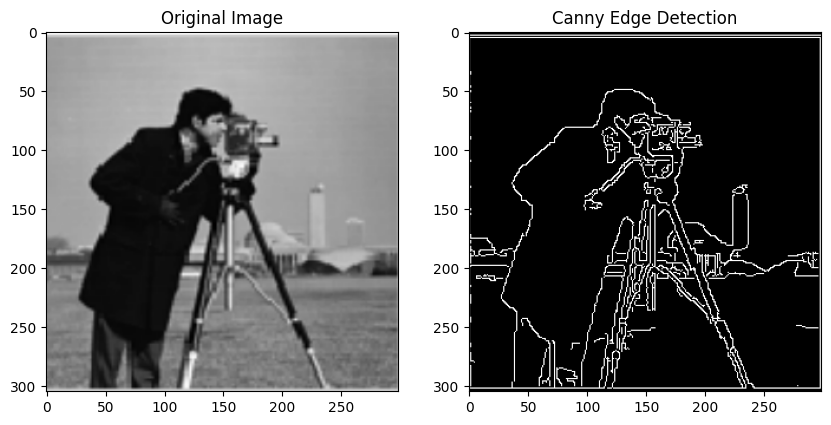

Image shape: (640, 568, 3), Image dtype: uint8


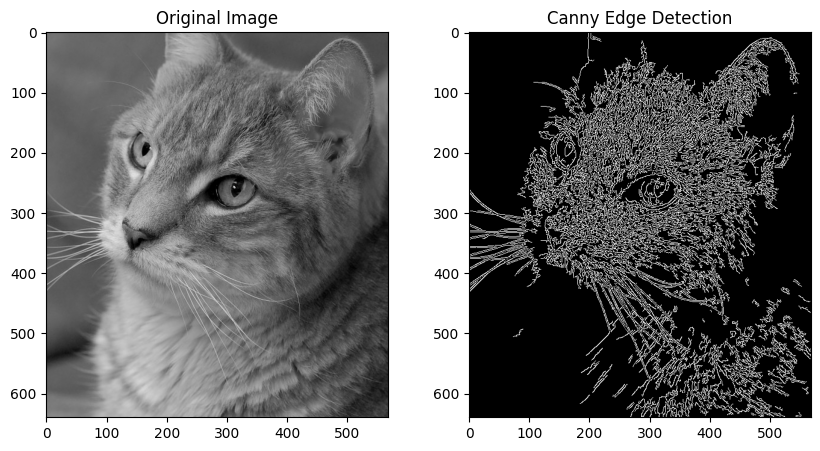

Image shape: (733, 1100, 3), Image dtype: uint8


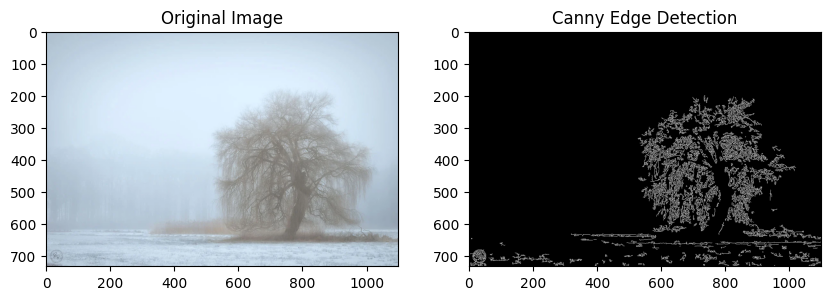

Image shape: (419, 600, 3), Image dtype: uint8


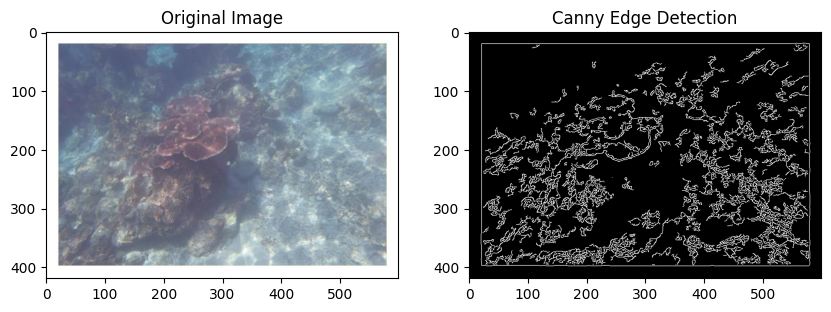

Image shape: (360, 640, 3), Image dtype: uint8


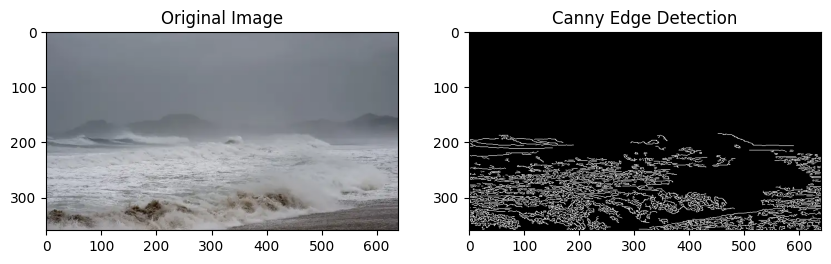

Image shape: (256, 256, 3), Image dtype: uint8


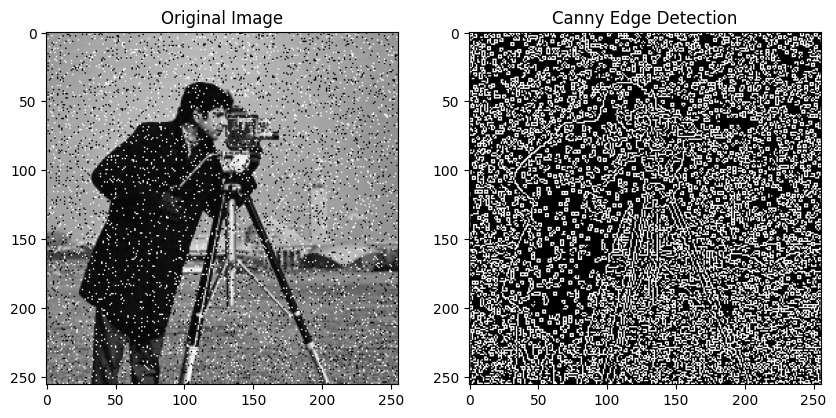

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming paths is a list containing file paths of images
for path in paths:
    img = cv2.imread(f"{path}")  # Read image

    # Check if img is None (indicating failure to read image)
    if img is None:
        print(f"Failed to read image: {path}")
        continue

    print(f"Image shape: {img.shape}, Image dtype: {img.dtype}")

    # Setting parameter values
    t_lower = 50  # Lower Threshold
    t_upper = 150  # Upper threshold

    # Applying the Canny Edge filter
    edge = cv2.Canny(img, t_lower, t_upper)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')

    axes[1].imshow(edge, cmap='gray')
    axes[1].set_title('Canny Edge Detection')

    plt.show()

    # Wait for user input to proceed to the next image
    cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()


In [4]:
paths = [path1, path6]

In [5]:
results = []

### Traditional Canny operator

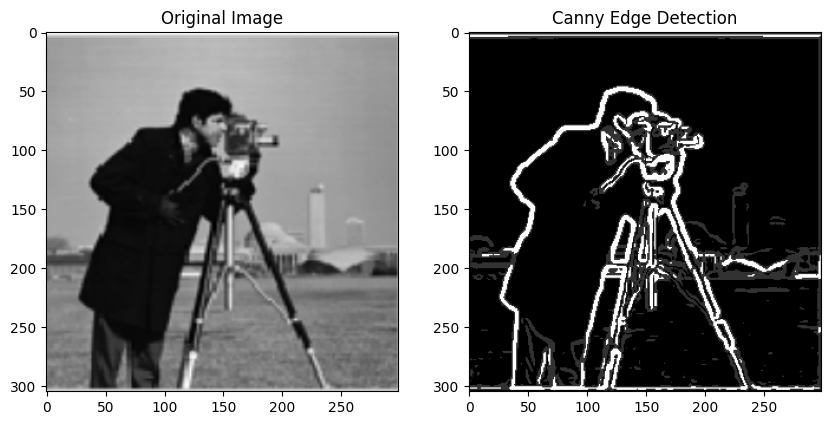

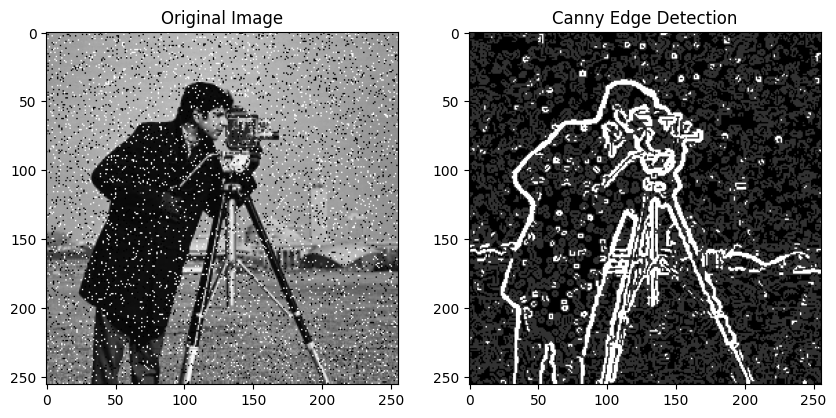

In [6]:
output = []

for path in paths:

  image = cv2.imread(f"{path}", 0)

  # Apply Gaussian filter to smooth the image
  blurred = cv2.GaussianBlur(image, (5, 5), 0)

  # Calculate gradient amplitude and direction using Sobel operator
  gradient_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
  gradient_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
  gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
  gradient_direction = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

  # Perform dual threshold edge connection-
  low_threshold = 50
  high_threshold = 150
  edges = np.zeros_like(gradient_magnitude)
  strong_edges = (gradient_magnitude > high_threshold)
  weak_edges = (gradient_magnitude > low_threshold) & (gradient_magnitude <= high_threshold)
  edges[strong_edges] = 255
  edges[weak_edges] = 50

  # Refine the edges using edge refinement techniques
  # (This step is not explicitly mentioned in the document, so a specific refinement technique is not provided)

  output.append(edges)

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axes[0].set_title('Original Image')

  axes[1].imshow(edges, cmap='gray')
  axes[1].set_title('Canny Edge Detection')

  plt.show()

results.append(output)

### Improved Canny operator using Adaptive Threshold Selection for noisy image (salt and pepper)

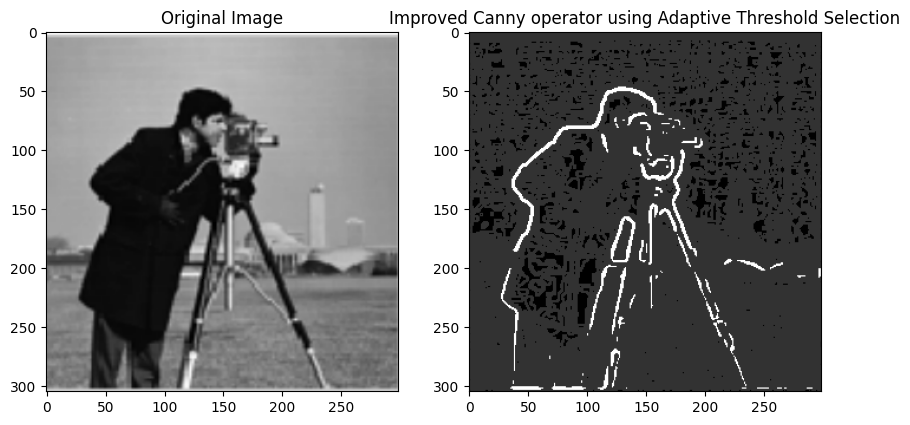

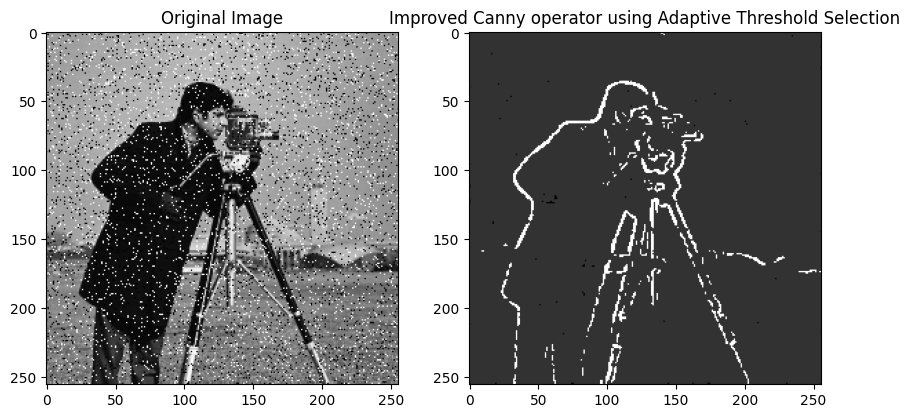

In [7]:
output = []

for path in paths:

  image = cv2.imread(f"{path}", 0)

  # Step 1: Use a Gaussian filter to smooth the image
  blurred = cv2.GaussianBlur(image, (5, 5), 0)

  # Step 2: Calculate gradient magnitude and direction using the three times three neighborhoods and the four-direction Sobel operator
  gradient_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
  gradient_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
  gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
  gradient_direction = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

  # Step 3: Adaptive threshold selection using the basic global threshold segmentation algorithm
  low_threshold = np.min(gradient_magnitude)
  high_threshold = np.max(gradient_magnitude) * 0.5  # Adjust the threshold as needed

  # Step 4: Perform dual threshold edge connection
  edges = np.zeros_like(gradient_magnitude)
  strong_edges = (gradient_magnitude > high_threshold)
  weak_edges = (gradient_magnitude > low_threshold) & (gradient_magnitude <= high_threshold)
  edges[strong_edges] = 255
  edges[weak_edges] = 50  # Adjust the weak edge threshold as needed

  # Step 5: Edge refinement using non-maximum suppression method
  # (Specific refinement technique not provided in the document)

  output.append(edges)

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axes[0].set_title('Original Image')

  axes[1].imshow(edges, cmap='gray')
  axes[1].set_title('Improved Canny operator using Adaptive Threshold Selection')

  plt.show()

results.append(output)

### Improved Canny operator using Hybrid Filter Design for noisy image (salt and pepper)

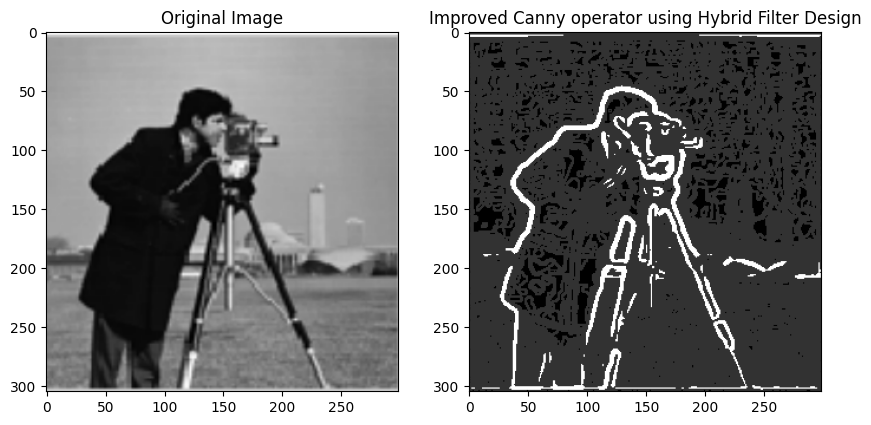

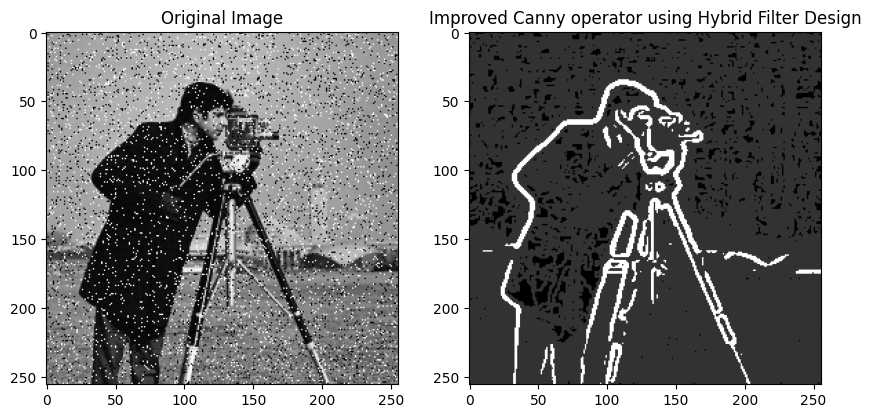

In [8]:
output = []

for path in paths:

  image = cv2.imread(f'{path}', 0)

  # Step 1: Apply a hybrid filter for image denoising
  def adaptive_median_filter(image, window_size):
      # Implement adaptive median filter
      filtered_image = cv2.medianBlur(image, window_size)
      return filtered_image

  def gaussian_filter(image, kernel_size, sigma):
      # Apply Gaussian filter
      smoothed_image = cv2.GaussianBlur(image, kernel_size, sigma)
      return smoothed_image

  # Apply adaptive median filter
  filtered_image = adaptive_median_filter(image, window_size=3)

  # Apply Gaussian filter to the filtered image
  smoothed_image = gaussian_filter(filtered_image, kernel_size=(5, 5), sigma=1.5)

  # Step 2: Calculate gradient magnitude and direction using the 4-direction Sobel operator
  gradient_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
  gradient_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)
  gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
  gradient_direction = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

  # Step 3: Adaptive threshold selection using the basic global threshold segmentation algorithm
  low_threshold = np.min(gradient_magnitude)
  high_threshold = np.max(gradient_magnitude) * 0.4  # Adjust the threshold as needed

  # Step 4: Perform dual threshold edge connection
  edges = np.zeros_like(gradient_magnitude)
  strong_edges = (gradient_magnitude > high_threshold)
  weak_edges = (gradient_magnitude > low_threshold) & (gradient_magnitude <= high_threshold)
  edges[strong_edges] = 255
  edges[weak_edges] = 50  # Adjust the weak edge threshold as needed

  # Step 5: Edge refinement using non-maximum suppression method
  # This could be implemented manually or using OpenCV's Canny edge detector with higher threshold ratio

  output.append(edges)

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axes[0].set_title('Original Image')

  axes[1].imshow(edges, cmap='gray')
  axes[1].set_title('Improved Canny operator using Hybrid Filter Design')

  plt.show()

results.append(output)

### Morphological Edge Detection

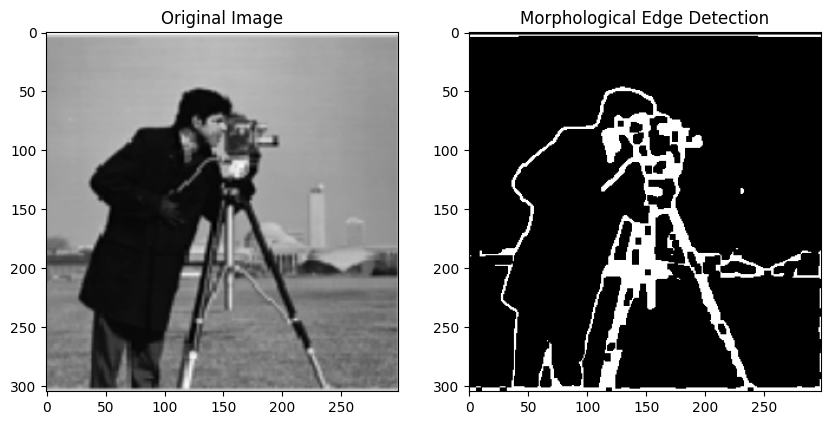

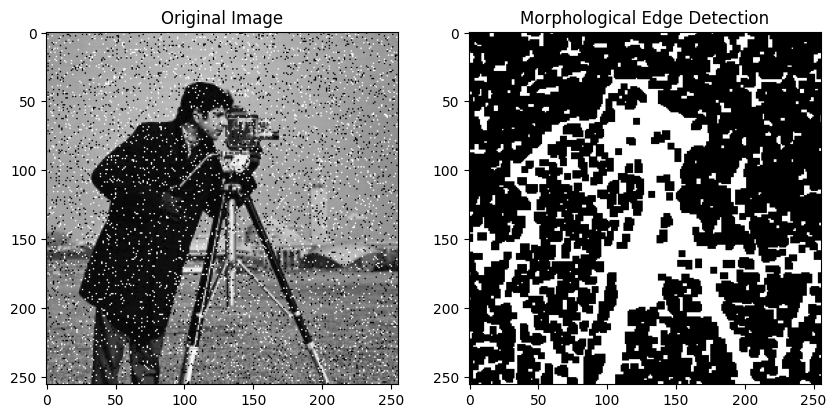

In [9]:
output = []

for path in paths:

  image = cv2.imread(f'{path}', 0)

  # Apply Gaussian blur to smooth the image
  blurred = cv2.GaussianBlur(image, (5, 5), 0)

  # Perform morphological gradient to detect edges
  kernel = np.ones((5, 5), np.uint8)
  gradient = cv2.morphologyEx(blurred, cv2.MORPH_GRADIENT, kernel)

  # Apply binary thresholding to extract edges
  _, edges = cv2.threshold(gradient, 30, 255, cv2.THRESH_BINARY)

  # Apply morphological erosion to make edges thinner
  kernel_erode = np.ones((5, 5), np.uint8)
  edges_thin = cv2.erode(edges, kernel_erode, iterations=1)

  output.append(edges_thin)

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axes[0].set_title('Original Image')

  plt.imshow(edges_thin, cmap='gray')
  axes[1].set_title('Morphological Edge Detection')

  plt.show()

results.append(output)

In [16]:
len(results)

4

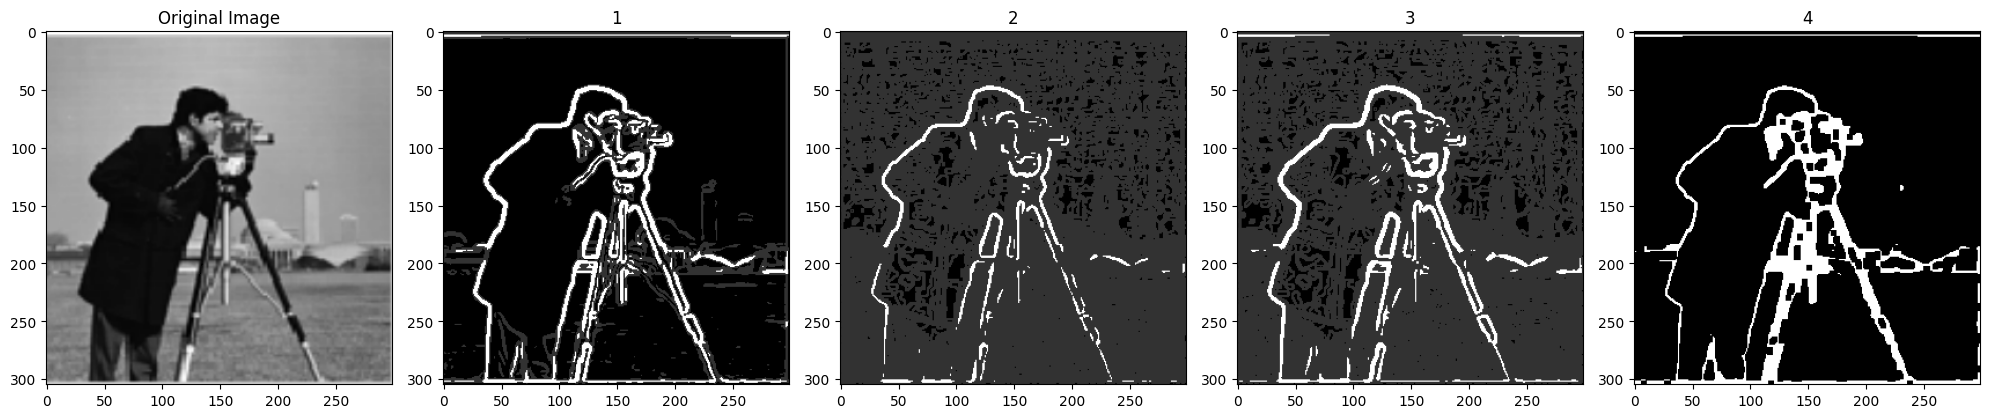

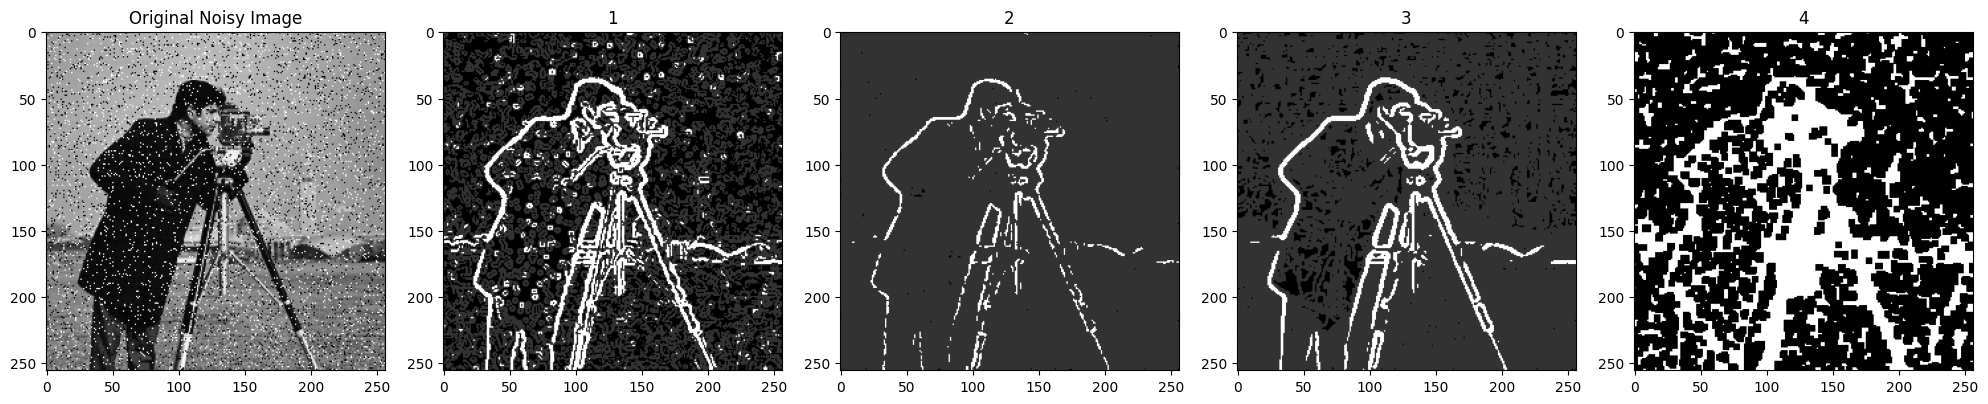

In [22]:
_, axes = plt.subplots(1, 5, figsize=(20, 8))

image = cv2.imread(f'{paths[0]}', 0)
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')

axes[1].imshow(results[0][0], cmap='gray')
axes[1].set_title('1')

axes[2].imshow(results[1][0], cmap='gray')
axes[2].set_title('2')

axes[3].imshow(results[2][0], cmap='gray')
axes[3].set_title('3')

axes[4].imshow(results[3][0], cmap='gray')
axes[4].set_title('4')

plt.tight_layout()

# ___________________________________________________________

_, axes = plt.subplots(1, 5, figsize=(20, 8))

image = cv2.imread(f'{paths[1]}', 0)
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Noisy Image')

axes[1].imshow(results[0][1], cmap='gray')
axes[1].set_title('1')

axes[2].imshow(results[1][1], cmap='gray')
axes[2].set_title('2')

axes[3].imshow(results[2][1], cmap='gray')
axes[3].set_title('3')

axes[4].imshow(results[3][1], cmap='gray')
axes[4].set_title('4')

plt.tight_layout()

1. Traditional Canny Edge Detection
2. Improved Canny operator using Adaptive Threshold Selection
3. Improved Canny operator using Hybrid Filter Design
4. Morphological Edge Detection